# Data Analysis of Time Series Retail Sales Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
import seaborn as sns

In [2]:
df = pd.read_csv("sales_train_evaluation.csv")

In [3]:
df.shape

(30490, 1947)

In [4]:
df.columns[:10]

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd_1',
       'd_2', 'd_3', 'd_4'],
      dtype='object')

In [5]:
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [6]:
cal= pd.read_csv("calendar.csv")

In [7]:
cal.shape

(1969, 14)

## Plot of average sales per weekday for random 100 products (colored by shop id)

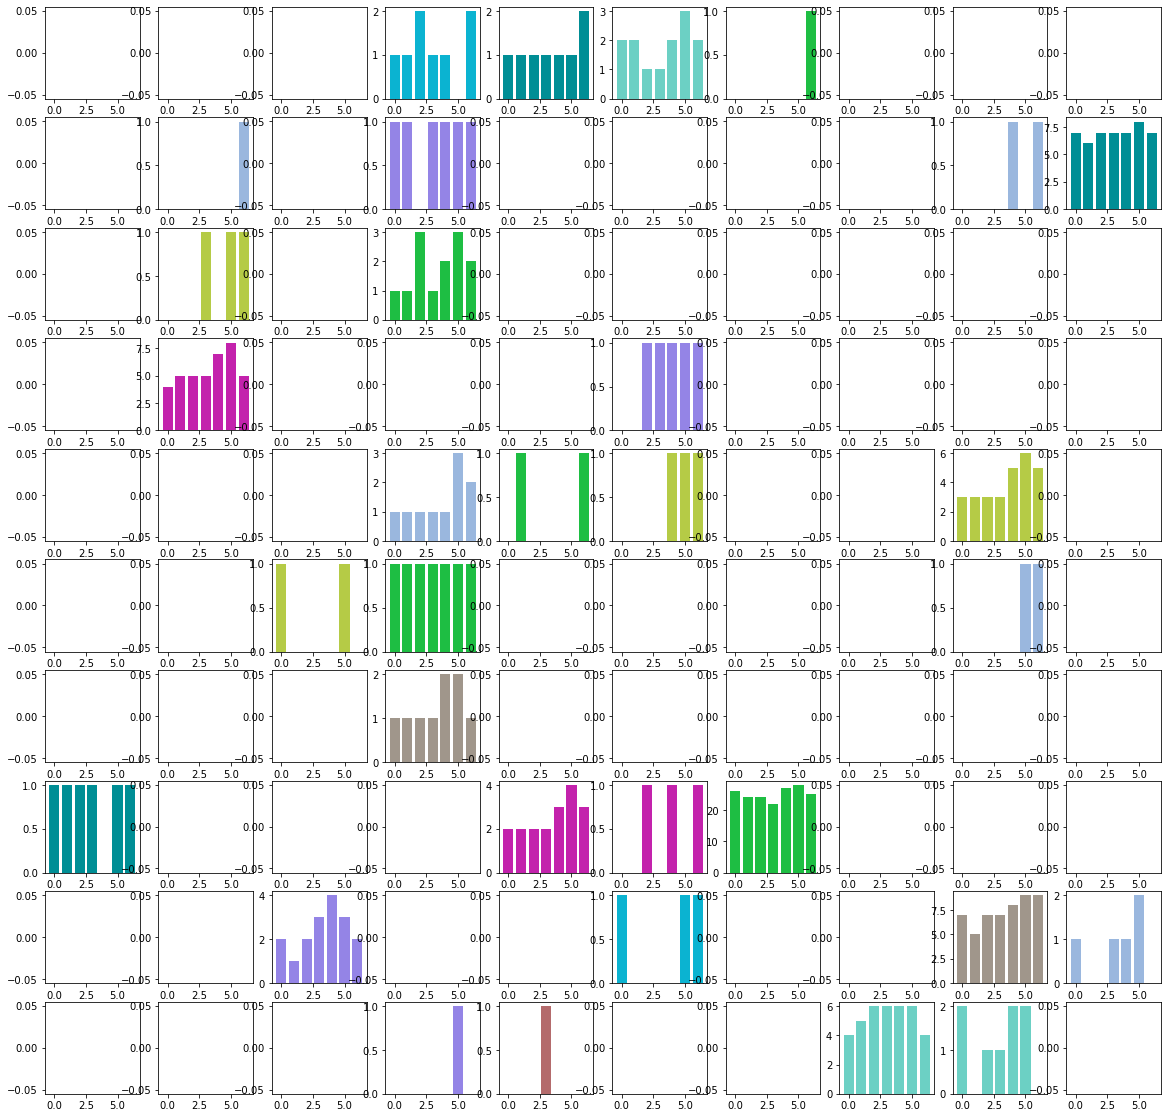

In [8]:
plt.figure(figsize=(20,20))
storelist= []
colorlist = []
for iteration in range(100):
    
    article = random.randint(0, len(df))
    store = df.iloc[article][4]
    
    av_values = []
    for day in range(0, 7):
        #print("day of the week: ", day, "average sale: ", np.average(df.iloc[article][6+day:-1600][::7].values))
        av_values.append(np.average(df.iloc[article][6+2+day:367][::7].values))
    ax = plt.subplot2grid((10, 10), (iteration//10, iteration%10))
    
    if df.iloc[article][4] not in storelist:
        storelist.append(store)
        color = list(np.random.choice(range(255), size=3)/255)
        colorlist.append(color)
    else:
        color = colorlist[storelist.index(store)]
    
    ax.bar(range(0, 7), av_values, color = color)


## Expected sale date vs number of sales by each department

In [10]:
categorylist= []
colorlist = []
plot_data = pd.DataFrame(columns = ["average", "day", "Product Category"])

for iteration in range(1000):
    
    article = random.randint(0, len(df))
    category = df.iloc[article][3]
    
    av_values = []
    av = np.average(df.iloc[article][6+2:])
    for day in range(0, 7):
        av_values.append(np.sum(df.iloc[article][6+2+day:367][::7].values))

    count = 0
    for index, i in enumerate(av_values):
        if count < np.sum(av_values)/2:
            count = count + i
        else:
            expected_day = index + (((count - av_values[index]) / count))

            break
    if category not in categorylist:
        categorylist.append(category)
        color = list(np.random.choice(range(255), size=3)/255)
        colorlist.append(color)
    else:
        color = colorlist[categorylist.index(category)]
    
    plot_data = plot_data.append({"average": av, "day": expected_day, "Product Category": category}, ignore_index=True)
#     plt.scatter(av, expected_day, color = color, label = category)
# plt.ylabel("Expected Day")
# plt.xlabel("Average sales ")
# plt.legend()

C:\Users\DIEGO UNZUETA\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in longlong_scalars


[Text(0.5, 0, 'Average number of sales'),
 Text(0, 0.5, 'Expected week day sale')]

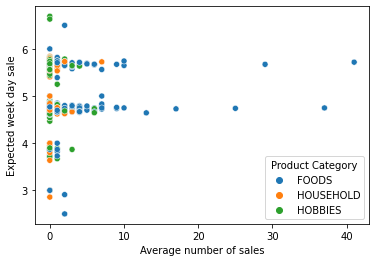

In [11]:
ax = sns.scatterplot(data = plot_data, x = "average", y = "day", hue = "Product Category")
ax.set(xlabel='Average number of sales', ylabel='Expected week day sale')

## Recursive least squares

In [152]:
X = df.iloc[article][6:].values
start = 1
R0 = X[0:start].T * X[0:start]
P0 = 1/R0

w0 = P0 * X[0:start].T * X[start+1]
ploterror = []
L = 0.6

In [153]:


Pn = P0
wn = w0

pred = []
out = []
print(wn.shape)

for i in range(len(X)-start-1):
    if Pn == 0:
        Pn = np.asarray(0.001)
    Xn = X[start + i]
    Yn = X[start + i + 1]
    
    kn = (((1/L) * Pn * Xn) / ((1+(1/L) * Xn.T * Pn * Xn)))
    #print(kn.shape)
    pred.append(wn*Xn)
    out.append(Yn)
    
    en = Yn - wn.T * Xn
    wn = wn + kn * en
    
    #print("PREDICTION: ", wn*Xn, "Value: ", Yn)
#     pred.append(wn*Xn)
#     out.append(Yn)
    #wn2 = wn - kn * (Xn.T @ wn - Yn)
    #print(en)
    Pn = (1/L) * Pn - (1/L) * kn * Xn.T * Pn
    #print(kn - Pn@Xn)
    

(1,)


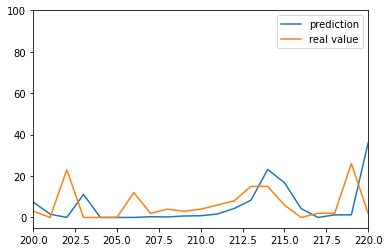

In [154]:
plt.plot([i for i in range(len(pred))], pred, label = "prediction")
plt.plot([i for i in range(len(pred))], out, label = "real value")
plt.xlim(200, 220)
plt.ylim(-5,100)
plt.legend()

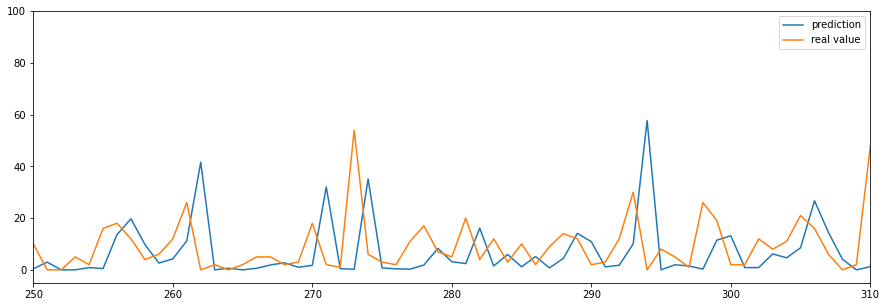

In [155]:
plt.figure(figsize=(15,5))
plt.plot([i for i in range(len(pred))], pred, label = "prediction")
plt.plot([i for i in range(len(pred))], out, label = "real value")
plt.xlim(250, 310)
plt.ylim(-5,100)
plt.legend()

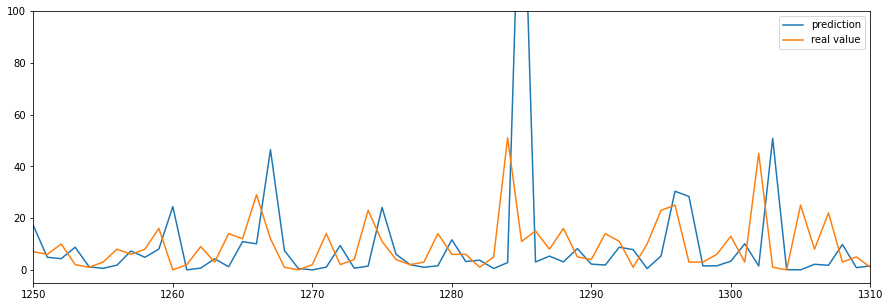

In [156]:
plt.figure(figsize=(15,5))
plt.plot([i for i in range(len(pred))], pred, label = "prediction")
plt.plot([i for i in range(len(pred))], out, label = "real value")
plt.xlim(1250, 1310)
plt.ylim(-5,100)
plt.legend()